In [155]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
image1 = imageio.imread("band1.gif")
B1 = image1.mean(axis=2)
image2 = imageio.imread("band2.gif")
B2 = image2.mean(axis=2)
image3 = imageio.imread("band3.gif")
B3 = image3.mean(axis=2)
image4 = imageio.imread("band4.gif")
B4 = image4.mean(axis=2)


/tmp/ipykernel_37232/2476096231.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image1 = imageio.imread("band1.gif")
/tmp/ipykernel_37232/2476096231.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image2 = imageio.imread("band2.gif")
/tmp/ipykernel_37232/2476096231.py:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image3 = imageio.imread("band3.gif")
/tmp/ipykernel_37232/2

In [156]:
combined_matrix1 = np.stack([B1, B2, B3, B4], axis=-1)
combined_matrix=combined_matrix1.reshape(512*512,4)

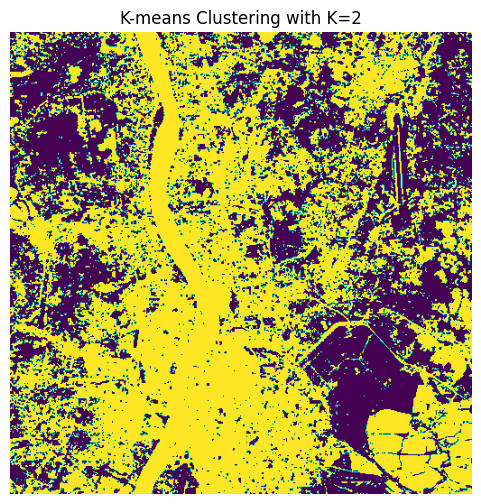

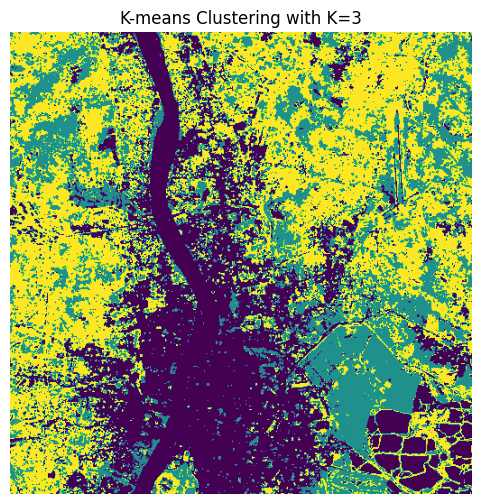

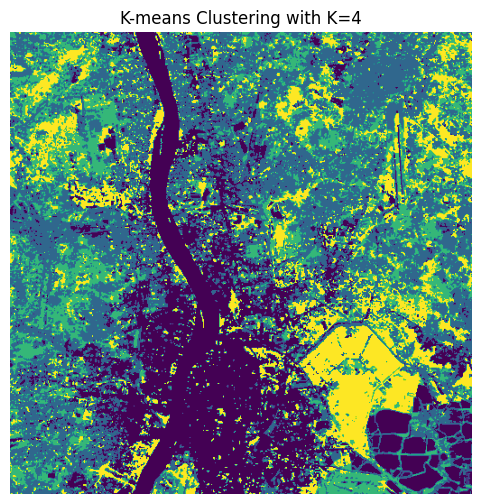

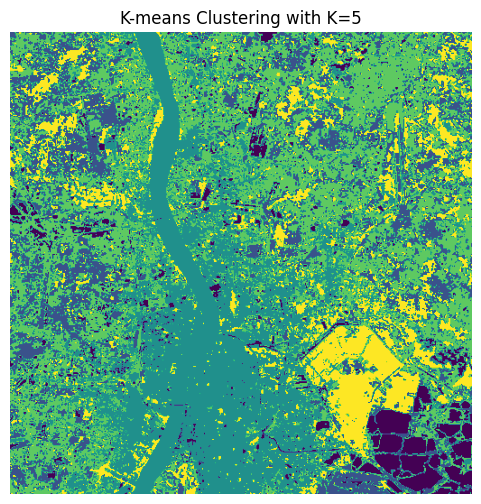

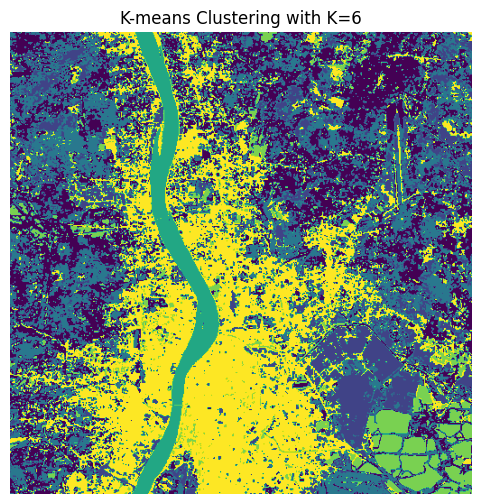

In [157]:
# K-means clustering algorithm
def kmeans(data, k, max_iterations=100):
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]
    
    for _ in range(max_iterations):
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        clusters = np.argmin(distances, axis=1)
        new_centroids = np.array([data[clusters == i].mean(axis=0) for i in range(k)])
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return clusters
K_values = [2, 3, 4, 5, 6]
for k in K_values:
    clusters= kmeans(combined_matrix, k)
    plt.figure(figsize=(6, 6))
    plt.imshow(clusters.reshape(512, 512), cmap='viridis') 
    plt.title(f'K-means Clustering with K={k}')
    plt.axis('off')
    plt.show()
